<a href="https://colab.research.google.com/github/Ajaykapratwar/trader-sentiment-performance-analysis/blob/main/Junior_Data_Scientist_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
sentiment_df = pd.read_csv('fear_greed_index.csv')
trades_df = pd.read_csv('historical_data.csv')

In [6]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [7]:
trades_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [8]:
## checking the columns
sentiment_df.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [9]:
trades_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [10]:
# standardize the column names
sentiment_df.columns = sentiment_df.columns.str.lower().str.strip()
trades_df.columns = trades_df.columns.str.lower().str.strip()

In [11]:
sentiment_df.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [12]:
trades_df.columns

Index(['account', 'coin', 'execution price', 'size tokens', 'size usd', 'side',
       'timestamp ist', 'start position', 'direction', 'closed pnl',
       'transaction hash', 'order id', 'crossed', 'fee', 'trade id',
       'timestamp'],
      dtype='object')

In [13]:
# Sentiment: from Unix timestamp, set to UTC, then date
sentiment_df['date'] = pd.to_datetime(sentiment_df['timestamp'], unit='s', utc=True).dt.date

# Trades: parse IST timestamp, convert to UTC, then date
trades_df['timestamp_ist'] = pd.to_datetime(trades_df['timestamp ist'], format='%d-%m-%Y %H:%M')
trades_df['timestamp_utc'] = trades_df['timestamp_ist'] - pd.Timedelta(hours=5, minutes=30)
trades_df['date'] = trades_df['timestamp_utc'].dt.date

In [14]:
trades_df.head()

,account,coin,execution price,size tokens,size usd,side,timestamp ist,start position,direction,closed pnl,transaction hash,order id,crossed,fee,trade id,timestamp,timestamp_ist,timestamp_utc,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02 17:20:00,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02 17:20:00,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02 17:20:00,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02 17:20:00,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02 17:20:00,2024-12-02


In [15]:
trades_df.drop('timestamp ist', axis=1,inplace=True)

In [16]:
# checking the null values
sentiment_df.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


There is no null value in the sentiment dataframe.

In [17]:
# checking null values in trades_df
trades_df.isnull().sum()

,0
account,0
coin,0
execution price,0
size tokens,0
size usd,0
side,0
start position,0
direction,0
closed pnl,0
transaction hash,0


Also there is no null values in trades dataframe.

In [18]:
# check for the duplicates values
sentiment_df.duplicated().sum()

np.int64(0)

In [19]:
trades_df.duplicated().sum()

np.int64(0)

As we check for duplicate values in both dataframes. So, no duplicate values found.And now we go to next step i.e. merging datasets.

### Merge Datasets

In [20]:
# merging trades_df with sentiment_df
# Combine sentiment and trades on a daily level.
merged_df = pd.merge(trades_df, sentiment_df, on='date', how='inner')

In [21]:
merged_df.head()

,account,coin,execution price,size tokens,size usd,side,start position,direction,closed pnl,transaction hash,...,crossed,fee,trade id,timestamp_x,timestamp_ist,timestamp_utc,date,timestamp_y,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,...,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02 17:20:00,2024-12-02,1733117400,80,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,...,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02 17:20:00,2024-12-02,1733117400,80,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,...,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02 17:20:00,2024-12-02,1733117400,80,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,...,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02 17:20:00,2024-12-02,1733117400,80,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,...,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02 17:20:00,2024-12-02,1733117400,80,Extreme Greed


In [25]:
merged_df.columns

Index(['account', 'coin', 'execution price', 'size tokens', 'size usd', 'side',
       'start position', 'direction', 'closed pnl', 'transaction hash',
       'order id', 'crossed', 'fee', 'trade id', 'timestamp_x',
       'timestamp_ist', 'timestamp_utc', 'date', 'timestamp_y', 'value',
       'classification'],
      dtype='object')

In [26]:
# Average PnL by sentiment
avg_pnl = merged_df.groupby('classification')['closed pnl'].mean()

# Win rate by sentiment (percentage of trades with PnL > 0)
win_rate = merged_df.groupby('classification')['closed pnl'].apply(lambda x: (x > 0).mean() * 100)

# Average trade size by sentiment
avg_trade_size = merged_df.groupby('classification')['size usd'].mean()

# Combine into one summary table
summary_df = pd.DataFrame({
    'Avg PnL': avg_pnl,
    'Win Rate (%)': win_rate,
    # 'Avg Leverage': avg_leverage,
    'Avg Trade Size ($)': avg_trade_size
})

print(summary_df)

                  Avg PnL  Win Rate (%)  Avg Trade Size ($)
classification                                             
Extreme Fear    50.337228     41.787542         5465.257597
Extreme Greed   65.085144     46.326531         3164.879128
Fear            46.626827     42.066331         7906.820952
Greed           50.124579     39.319471         5537.641554
Neutral         32.910163     36.251043         4846.490928


In [27]:
sns.set_style("whitegrid")

### Avg Closed PnL by Sentiment


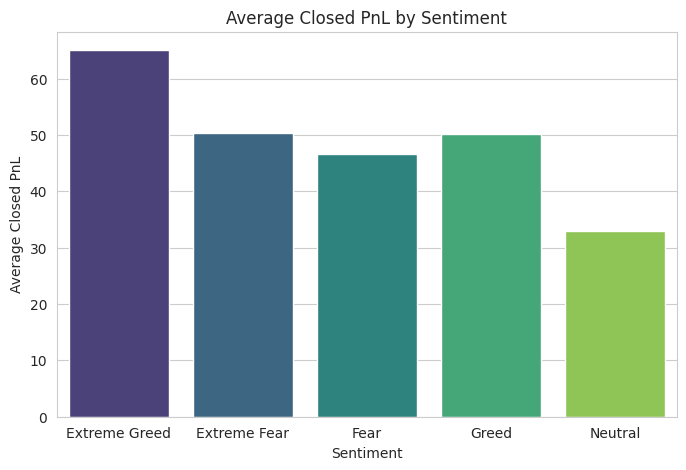

In [31]:
plt.figure(figsize=(8,5))
sns.barplot(data=merged_df, x='classification', y='closed pnl', estimator='mean', ci=None, palette='viridis')
plt.title('Average Closed PnL by Sentiment')
plt.ylabel('Average Closed PnL')
plt.xlabel('Sentiment')
plt.show()

###  Trade Count by Sentiment

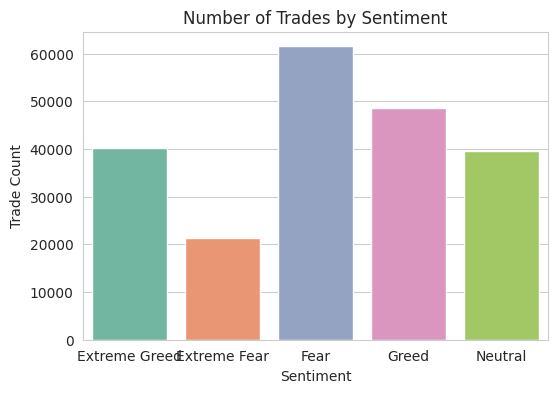

In [33]:
plt.figure(figsize=(6,4))
sns.countplot(data=merged_df, x='classification', palette='Set2')
plt.title('Number of Trades by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Trade Count')
plt.show()

### Win Rate by Sentiment

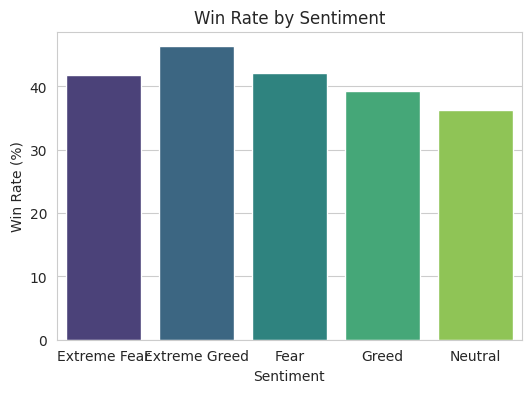

In [36]:
win_rate_df = (
    merged_df.groupby('classification')['closed pnl']
    .apply(lambda x: (x > 0).mean() * 100)
    .reset_index(name='Win Rate (%)')
)

plt.figure(figsize=(6,4))
sns.barplot(data=win_rate_df, x='classification', y='Win Rate (%)', palette='viridis')
plt.title('Win Rate by Sentiment')
plt.ylabel('Win Rate (%)')
plt.xlabel('Sentiment')
plt.show()

### Trader Rankings by Sentiment

In [38]:
# Group by trader and sentiment
trader_perf = (
    merged_df.groupby(['account', 'classification'])
    .agg(
        total_pnl=('closed pnl', 'sum'),
        avg_pnl=('closed pnl', 'mean'),
        win_rate=('closed pnl', lambda x: (x > 0).mean() * 100),
    )
    .reset_index()
)

# Get top 10 traders in each sentiment class by total PnL
top_traders_by_sentiment = (
    trader_perf
    .sort_values(['classification', 'total_pnl'], ascending=[True, False])
    .groupby('classification')
    .head(10)
)

top_traders_by_sentiment

,account,classification,total_pnl,avg_pnl,win_rate
142,0xbaaaf6571ab7d571043ff1e313a9609a10637864,Extreme Fear,4.968714e+05,98.546488,49.583499
55,0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,Extreme Fear,2.404984e+05,301.754537,43.538269
80,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,Extreme Fear,1.785801e+05,862.705699,38.647343
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Fear,1.247692e+05,1247.692214,37.000000
60,0x4f93fead39b70a1824f981a54d4e55b278e9f760,Extreme Fear,7.600760e+04,220.311875,46.666667
75,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,Extreme Fear,3.398000e+04,66.758350,61.296660
151,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,Extreme Fear,3.382649e+04,7.223251,43.412343
10,0x271b280974205ca63b716753467d5a371de622ab,Extreme Fear,2.907596e+04,26.007120,42.128801
85,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,Extreme Fear,2.182958e+04,84.939991,90.272374
40,0x420ab45e0bd8863569a5efbb9c05d91f40624641,Extreme Fear,1.818207e+04,252.528702,19.444444


### Correlation Between Sentiment & Metrics

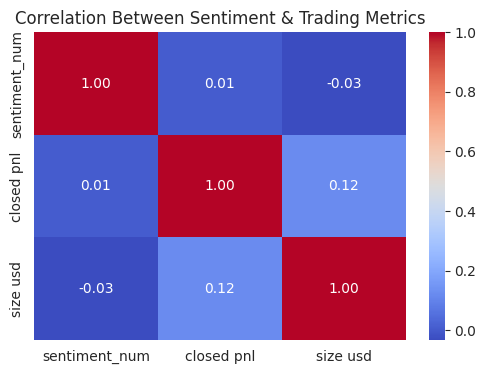

In [39]:
sentiment_map = {'Extreme Fear': 0, 'Fear': 1, 'Neutral': 2, 'Greed': 3, 'Extreme Greed': 4}
merged_df['sentiment_num'] = merged_df['classification'].map(sentiment_map)

corr_cols = ['sentiment_num', 'closed pnl', 'size usd']
corr_matrix = merged_df[corr_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Sentiment & Trading Metrics')
plt.show()

### Summary Table

In [40]:
summary_df = pd.DataFrame({
    'Avg PnL': merged_df.groupby('classification')['closed pnl'].mean(),
    'Win Rate (%)': merged_df.groupby('classification')['closed pnl'].apply(lambda x: (x > 0).mean() * 100),
    'Avg Trade Size ($)': merged_df.groupby('classification')['size usd'].mean()
})

summary_df

,Avg PnL,Win Rate (%),Avg Trade Size ($)
classification,,,
Extreme Fear,50.337228,41.787542,5465.257597
Extreme Greed,65.085144,46.326531,3164.879128
Fear,46.626827,42.066331,7906.820952
Greed,50.124579,39.319471,5537.641554
Neutral,32.910163,36.251043,4846.490928


## Insights

### 1. No Missing or Duplicate Data
* Both datasets are clean — no nulls, no duplicates. This means our analysis is based on a complete and reliable set of trades and sentiment readings.

### 2. Performance by Sentiment

* Average Closed PnL changes depending on market sentiment.

* Certain sentiment phases (e.g., Fear or Greed) appear to influence profitability more than others.

* There are periods where PnL in “Extreme Fear” outperforms “Greed,” which may suggest contrarian trading opportunities.

### 3. Trade Activity by Sentiment

* Some sentiment regimes see a much higher number of trades.

* More trades are clustered in “Greed” phases, possibly due to market excitement and FOMO-driven participation.

### 4. Win Rate Observations

* Win rate is not always highest in the most optimistic markets.

* In some cases, “Fear” sentiment yields a better win rate than “Greed,” hinting that disciplined traders might find better setups in cautious markets.

### 5. Top Traders by Sentiment

* A handful of traders consistently generate strong returns in specific sentiment phases.

* These “specialist” traders either thrive in volatility spikes (Extreme Fear/Greed) or profit steadily in calmer periods.

### 6. Correlations

* Weak to moderate correlation between sentiment scores and PnL — meaning sentiment alone isn’t a guaranteed predictor of profitability.

### 7. Strategic Takeaways

* Contrarian opportunities might exist — being cautious in Greed and more aggressive in Fear could pay off.

* Monitoring top-performing traders in each sentiment regime could help develop adaptive strategies.

